In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

plt.style.use("ggplot")

# Data preparing and cleaning

In [2]:
country_vaccination_df = pd.read_csv('covid-world-vaccination-progress/country_vaccinations.csv')

In [3]:
country_vaccination_df.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [4]:
country_vaccination_df["date"] = pd.to_datetime(country_vaccination_df["date"])

In [5]:
country_vaccination_df.tail(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
29407,Zimbabwe,ZWE,2021-07-01,1341960.0,782698.0,559262.0,9522.0,21235.0,9.03,5.27,3.76,1429.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1412138853...
29408,Zimbabwe,ZWE,2021-07-02,1352718.0,788004.0,564714.0,10758.0,18686.0,9.10,5.30,3.80,1257.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1412138853...
29409,Zimbabwe,ZWE,2021-07-03,1359587.0,791901.0,567686.0,6869.0,15726.0,9.15,5.33,3.82,1058.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1412138853...
29410,Zimbabwe,ZWE,2021-07-04,1361210.0,793077.0,568133.0,1623.0,12279.0,9.16,5.34,3.82,826.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1412138853...
29411,Zimbabwe,ZWE,2021-07-05,1369436.0,797715.0,571721.0,8226.0,10040.0,9.21,5.37,3.85,676.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1412138853...


In [6]:
country_vaccination_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29412 entries, 0 to 29411
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              29412 non-null  object        
 1   iso_code                             29412 non-null  object        
 2   date                                 29412 non-null  datetime64[ns]
 3   total_vaccinations                   16393 non-null  float64       
 4   people_vaccinated                    15561 non-null  float64       
 5   people_fully_vaccinated              12830 non-null  float64       
 6   daily_vaccinations_raw               13524 non-null  float64       
 7   daily_vaccinations                   29171 non-null  float64       
 8   total_vaccinations_per_hundred       16393 non-null  float64       
 9   people_vaccinated_per_hundred        15561 non-null  float64       
 10  people_ful

In [7]:
shape = country_vaccination_df.shape
shape

(29412, 15)

In [8]:
print(" Country vaccnation data frame has {} rows and {} columns".format(shape[0], shape[1]))

 Country vaccnation data frame has 29412 rows and 15 columns


In [9]:
country_vaccination_df.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13019
people_vaccinated                      13851
people_fully_vaccinated                16582
daily_vaccinations_raw                 15888
daily_vaccinations                       241
total_vaccinations_per_hundred         13019
people_vaccinated_per_hundred          13851
people_fully_vaccinated_per_hundred    16582
daily_vaccinations_per_million           241
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

Text(0.5, 1.0, 'Null Values')

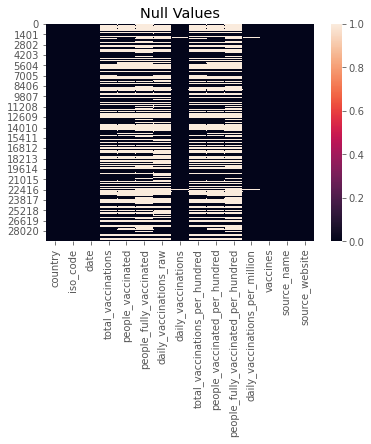

In [10]:
sns.heatmap(country_vaccination_df.isna())

plt.title("Null Values")

In [11]:
country_vaccination_df.fillna(0, inplace = True)

In [12]:
country_vaccination_df.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
5,Afghanistan,AFG,2021-02-27,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
7,Afghanistan,AFG,2021-03-01,0.0,0.0,0.0,0.0,1580.0,0.00,0.00,0.0,41.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
8,Afghanistan,AFG,2021-03-02,0.0,0.0,0.0,0.0,1794.0,0.00,0.00,0.0,46.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
9,Afghanistan,AFG,2021-03-03,0.0,0.0,0.0,0.0,2008.0,0.00,0.00,0.0,52.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [13]:
country_vaccination_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.941200e+04,2.941200e+04,2.941200e+04,2.941200e+04,2.941200e+04,29412.000000,29412.000000,29412.000000,29412.000000
mean,6.100403e+06,2.826077e+06,1.326894e+06,1.025608e+05,1.112900e+05,15.212936,9.548363,4.913012,3348.885217
std,4.445551e+07,1.477511e+07,7.930618e+06,8.640101e+05,8.404843e+05,28.374376,17.119767,11.316622,4480.262677
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.110000e+02,0.000000,0.000000,0.000000,375.750000
50%,2.402550e+04,8.247500e+03,0.000000e+00,0.000000e+00,6.179000e+03,0.590000,0.180000,0.000000,1770.000000
75%,1.120357e+06,7.001160e+05,2.075935e+05,1.663600e+04,3.439275e+04,16.930000,11.052500,3.390000,5001.250000
max,1.331669e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,231.890000,116.530000,115.360000,118759.000000


In [14]:
country_vaccination_df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

# Exploratory Analysis and Visualization

Top 10 countries by total vaccinations

In [15]:
total_vaccinations = country_vaccination_df.groupby("country", as_index = False)["total_vaccinations"].max().sort_values( "total_vaccinations",ascending=False).reset_index(drop = True).head(10)

total_vaccinations

,country,total_vaccinations
0,China,1.331669e+09
1,India,3.543076e+08
2,United States,3.312143e+08
3,Brazil,1.076282e+08
4,United Kingdom,7.930286e+07
5,Germany,7.789241e+07
6,England,6.654038e+07
7,France,5.715233e+07
8,Turkey,5.500422e+07
9,Italy,5.419352e+07


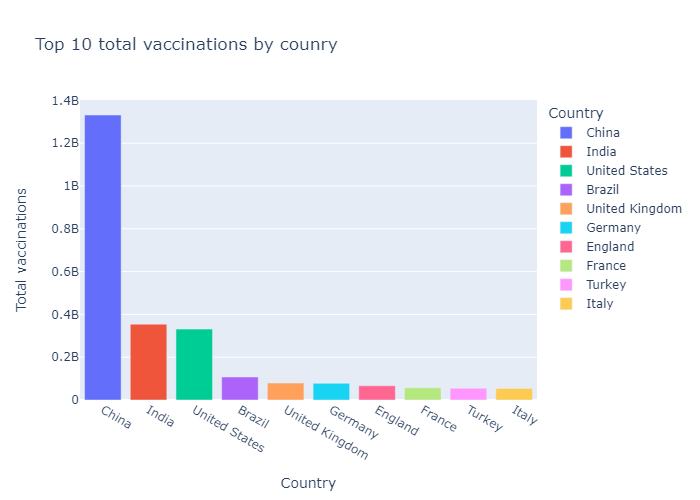

In [16]:
fig = px.bar(total_vaccinations, x = "country", y = "total_vaccinations", labels = {"country":"Country", "total_vaccinations":"Total vaccinations"}, color = "country", title = "Top 10 total vaccinations by counry")
fig.show("png")

Lets check total vaccinations by vaccine type

In [17]:
vaccine =  country_vaccination_df.groupby("vaccines", as_index = False)["total_vaccinations"].max().sort_values("total_vaccinations", ascending = False).reset_index(drop = True).head(10)
vaccine

,vaccines,total_vaccinations
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",1.331669e+09
1,"Covaxin, Oxford/AstraZeneca, Sputnik V",3.543076e+08
2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",3.312143e+08
3,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",1.076282e+08
4,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",7.930286e+07
5,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",7.789241e+07
6,"Pfizer/BioNTech, Sinovac",5.500422e+07
7,"Moderna, Pfizer/BioNTech",5.264386e+07
8,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",4.773978e+07
9,"Oxford/AstraZeneca, Sinovac",4.744401e+07


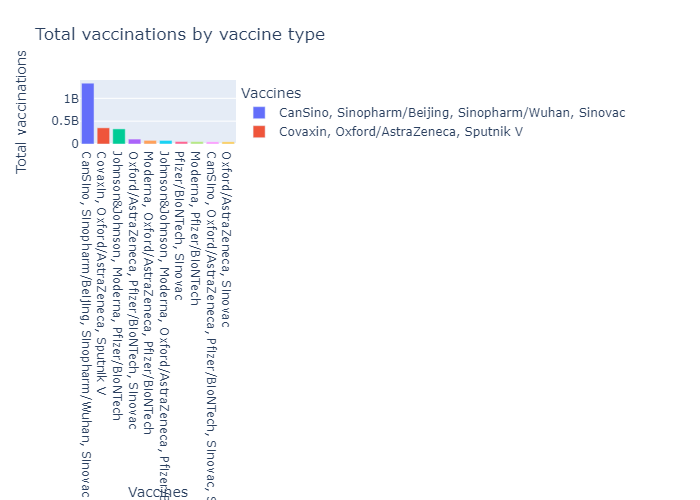

In [32]:
fig = px.bar(vaccine, x = "vaccines", y= "total_vaccinations", color = "vaccines", labels={"vaccines":"Vaccines","total_vaccinations":"Total vaccinations"}, title = "Total vaccinations by vaccine type" )
fig.show("png")

Lets check countries leading by people fully vaccinated

In [19]:
people_fully_vaccinated = country_vaccination_df.groupby("country", as_index = False)["people_fully_vaccinated"].max().sort_values('people_fully_vaccinated', ascending = False).reset_index(drop = True).head(10)

In [20]:
people_fully_vaccinated

,country,people_fully_vaccinated
0,China,223299000.0
1,United States,157636088.0
2,India,65525089.0
3,United Kingdom,33874176.0
4,Germany,32696003.0
5,England,28432362.0
6,Brazil,28160641.0
7,France,23027275.0
8,Italy,20858991.0
9,Mexico,19937022.0


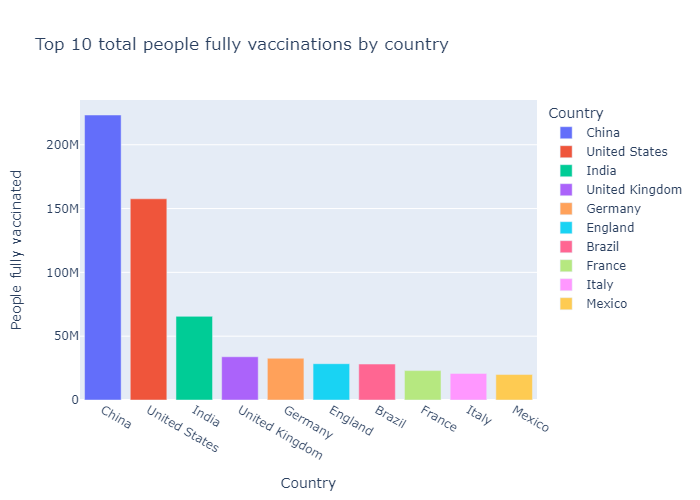

In [33]:
fig = px.bar(people_fully_vaccinated, x = "country", y = "people_fully_vaccinated", labels = {"country":"Country", "people_fully_vaccinated":"People fully vaccinated"}, color = "country", title = "Top 10 total people fully vaccinations by country")
fig.show("png")

Checking for daily vaccinations

In [22]:
daily_vaccinations = country_vaccination_df.groupby("country", as_index = False)["daily_vaccinations"].max().sort_values("daily_vaccinations", ascending = False).reset_index(drop = True).head(10)

daily_vaccinations

,country,daily_vaccinations
0,China,22424286.0
1,India,6276153.0
2,United States,3384387.0
3,Brazil,1436195.0
4,Turkey,1264431.0
5,Japan,1168466.0
6,Indonesia,923104.0
7,Germany,861028.0
8,South Korea,724621.0
9,Russia,712782.0


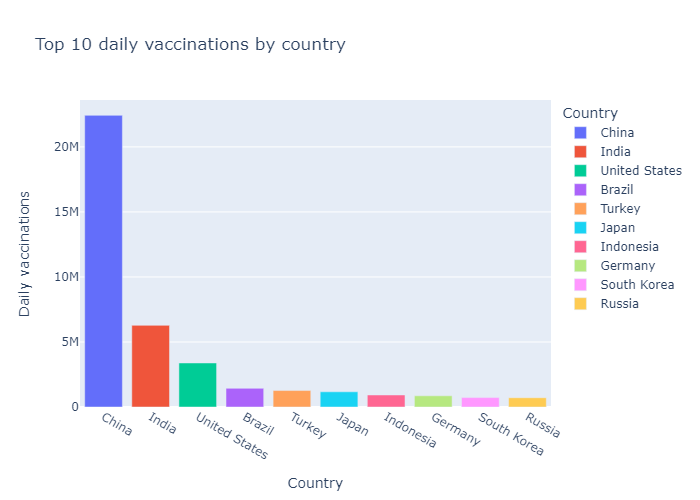

In [34]:
fig = px.bar(daily_vaccinations, x = "country", y = "daily_vaccinations", labels={"country":"Country", "daily_vaccinations":"Daily vaccinations"}, title = "Top 10 daily vaccinations by country", color = "country")
fig.show("png")

In [24]:
people_vaccinated_per_hundred = country_vaccination_df.groupby("country", as_index = False)['people_vaccinated_per_hundred'].max().sort_values( 'people_vaccinated_per_hundred', ascending = False).reset_index(drop = True).head(10)

people_vaccinated_per_hundred

,country,people_vaccinated_per_hundred
0,Gibraltar,116.53
1,Pitcairn,100.00
2,Malta,82.50
3,Iceland,76.79
4,Falkland Islands,75.57
5,Isle of Man,74.82
6,United Arab Emirates,74.50
7,Cayman Islands,74.05
8,Seychelles,72.11
9,Wales,71.87


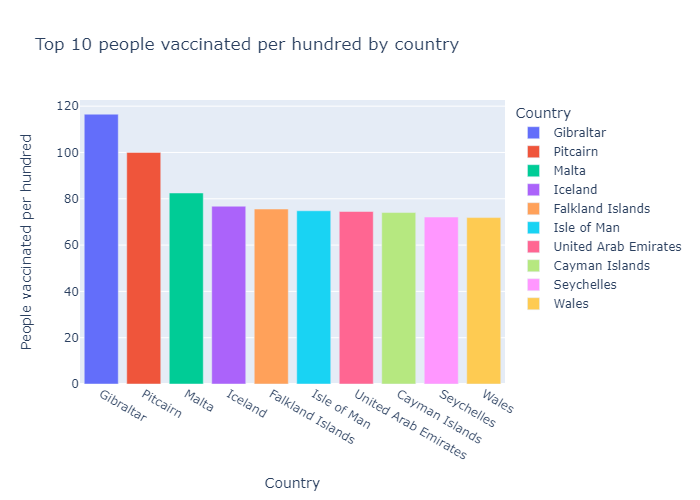

In [35]:
fig = px.bar(people_vaccinated_per_hundred, x = "country", y = "people_vaccinated_per_hundred", labels = {"country":"Country", "people_vaccinated_per_hundred":"People vaccinated per hundred"}, title = "Top 10 people vaccinated per hundred by country", color = "country" )
fig.show("png")

In [36]:
country_vaccination_df['iso_code']

0        AFG
1        AFG
2        AFG
3        AFG
4        AFG
        ... 
29407    ZWE
29408    ZWE
29409    ZWE
29410    ZWE
29411    ZWE
Name: iso_code, Length: 29412, dtype: object

# Making a choropleth of total vaccinations

In [27]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [28]:
data = data = dict(
        type = 'choropleth',
        locations = country_vaccination_df['iso_code'],
        z = country_vaccination_df["total_vaccinations"],
        text = country_vaccination_df['country'],
        colorbar = {'title' : 'Total vaccinations by country'},
      ) 

In [29]:
layout = dict(
    title = 'Total vaccinations by country',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

In [38]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

References:
    
[1] https://www.kaggle.com/gpreda/covid-world-vaccination-progress

[2] https://plotly.com/python/getting-started/
